In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

Text data can be one of the most challenging types of data to work with. People can speak to each other and grab meaning pretty quickly, but the built-in context, grammar, and meaning is incredibly difficult to code.

The process of working with text data is called natural language processing (NLP).

The techniques used to encode text data into something that a computer can understand can be incredibly complex! We will start with the building blocks today, although there are much more complex neural network methods to encode text, one of the most popular of which is `word2vec`.

### Text as Data

We have already seen at least some text treated as features in our models. When we have simple categorical data, with labels like red, green, or blue, we know that we can simply code them as integers (if they are ordinal) or dummy variables (if they are nominal), depending on our model.

This is the essence of what we will do with any text data: find a numeric representation that we can feed into our models.

### Common Vocabulary in Text Analysis
When working with text data, we'll usually be dealing with many individual text files, each usually considered to be an individual data point (e.g. product reviews, documents, song lyrics, etc.)

When working with text data, there is some common language that we'll use. 

**Corpus**: The entire data set or collection of text files. If working with product reviews, the corpus would be all of the individual reviews. 

**Document**: One individual text file. If working with product reviews, a document would be one individual review. 

**Tokens**: In processing the documents, we will break them down into paragraphs and sentences into sequences of short strings called tokens. These could be the (processed) words/phrases from the original document, maybe pairs of consecutive words or even just parts of words.
* I love Brainstation: [I, love, Brainstation]
* showering: 'shower' + 'ing'
* faster: 'fast' + 'er'

**Vocabulary**: the collection of all unique words/tokens from the corpus.

### The text data workflow

The basic steps of working with text data is: 

- Step 1: Convert text data into numeric data (the step that is unique to NLP)

- Step 2: Feed numeric data into required model


#### Step 1 
This is the part that requires a lot of detailed preprocessing. There are many ways to convert text data into numeric data. We usually want to make some kind of matrix that stores information about the frequency of individual words or phrases in the data set. The unique words or phrases are the tokens. 

---
#### Exercise 1

If we consider tokens to be unique words, what would the tokens be in this corpus? How often does each token occur? Place the counts of each token into a table where the tokens are the columns and each document is a row. 

Corpus: 

`BrainStation is awesome!`

`We are learning so much at BrainStation.`

`The learning is so great...`
<br><br>
Use the following table to fill in the correct counts:


|          | BrainStation | is | awesome | we | are | learning | so | much | at | the | great |
|----------|--------------|----|---------|----|-----|----------|----|------|----|-----|-------|
|sentence1 |              |    |         |    |     |          |    |      |    |     |       |
|sentence2 |              |    |         |    |     |          |    |      |    |     |       |
|sentence3 |              |    |         |    |     |          |    |      |    |     |      |



---

#### Solution

|          | BrainStation | is | awesome | we | are | learning | so | much | at | the  | great |
|----------|--------------|----|---------|----|-----|----------|----|------|----|-----|-------|
|sentence1 |        1     |  1 |    1    |  0  |   0  |    0      |   0 |   0   |   0 |    0  |   0    |
|sentence2 |        1     |  0  |    0     |  1 | 1   |   1      | 1  |  1   | 1  |   0     |    0   |
|sentence3 |         0     | 1  |     0    |  0  |   0  |   1      | 1  |    0  | 0   |  1     |   1   |


sentence1: `[1 1 1 0 0 0 0 0 0 0 0]`\
sentence2: `[1 0 0 1 1 1 1 1 1 0 0]`\
sentence3: `[0 1 0 0 0 1 1 0 0 1 1]`

#### Vectorization

In the above example, you performed NLP! In particular, you created a **document-term matrix**, that is you encoded text data into a numeric matrix that any computer can understand. 

This idea of making a document-term matrix, where each row is a document and each column is a unique token, is the basic idea of NLP. 

The methods for creating these document-term matrices are called **vectorizers** and we'll look at two today:

- **Bag of Words**: Storing the counts of each unique word from our corpus for each document.


- **TF-IDF**: Storing a measure of the *relevance* of every word in each document by reweighing the counts. In other words, it reflects how important a word is to a document in a corpus


#### Text Processing

A key part of NLP is simplifying our text data to allow our models to focus on the most *meaningful* tokens within each document. We will cover a number of steps to clean our text and bring it to the best form for exploration and modeling. The most important steps include:

- **Tokenizing**: Something that might have come up in Exercise 1 is the issue of punctuation. Do we include that in the token or just remove it? This is a common issue in NLP, along with a few other problems when we talk about *tokenizing* text data. 


- **Stop word removal**: You might have also considered how to deal with common stop words (and, or, the, etc.). These words are very common in language and usually link parts of sentences rather than conveying particular meaning or information. 


- **Stemming and lemmatization**: Another example is actually modifying the unique words like shortening words from *working* to *work* to try and reduce the number of columns in the matrix and encode commonality between sentences like: 

`I am working.` 

`I am at work.`


The above sentences have very similar meaning, but if we put them into a document-term matrix, the two sentences are going to look different because `working` and `work` are considered different tokens.

This are just some steps of the preprocessing we'll need to complete before implementing the vectorization mentioned above.

#### Step 2
After our data is transformed into a matrix of numerical values, we can easily feed that into any required model. Some common text data problems that require model fitting are document sorting (into categories like financial, medical, etc.) or sentiment analysis, which refers to learning if the text is positive or negative in sentiment. 

We'll explore NLP (i.e. Step 1) through building a model for sentiment analysis.

### Sentiment Analysis

Sentiment analysis refers to the understanding of the mood of text. For example, if our company is suddenly trending on Twitter, we care a lot about if they are tweeting good things or bad things. Similarly, reviews of restaurants and movies often have a "sentiment" or star rating, that we can tie back to the text. 

Most sentiment analysis models are built on the use of certain keywords - like good, great, bad, terrible - or a model based on known sentiments (e.g. a Yelp review, with a star rating) compared to an unknown text.

Let's load some data. The data here is single sentences from reviews of movies on [Rotten Tomatoes](https://www.rottentomatoes.com/). Download it [from here](https://drive.google.com/open?id=1cxSoOz4zdVJoMe8uvUp7K1tJ0C58iXa0).

In [3]:
data = pd.read_csv('rottentomatoes.csv')
data.head()

,SentenceId,Phrase,Sentiment
0,1,A series of escapades demonstrating the adage ...,1
1,2,"This quiet , introspective and entertaining in...",4
2,3,"Even fans of Ismail Merchant 's work , I suspe...",1
3,4,A positively thrilling combination of ethnogra...,3
4,5,Aggressive self-glorification and a manipulati...,1


The data is a `SentenceId` for each sentence, the review as `Phrase`, and the rating given by the user, `Sentiment`. In this data set, the rating ranges from 0 to 4. We can look at samples of the data to see phrases and their associated reviews:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SentenceId  8529 non-null   int64 
 1   Phrase      8529 non-null   object
 2   Sentiment   8529 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 200.0+ KB


In [5]:
print(data[['Phrase', 'Sentiment']].sample(4).values)

[["This is not Chabrol 's best , but even his lesser works outshine the best some directors can offer ."
  2]
 ["A muddled limp biscuit of a movie , a vampire soap opera that does n't make much sense even on its own terms ."
  0]
 ["Completely creatively stillborn and executed in a manner that I 'm not sure could be a single iota worse ... a soulless hunk of exploitative garbage ."
  0]
 ["Though Tom Shadyac 's film kicks off spookily enough , around the halfway mark it takes an abrupt turn into glucose sentimentality and laughable contrivance ."
  1]]


Let's look at the distribution of ratings:

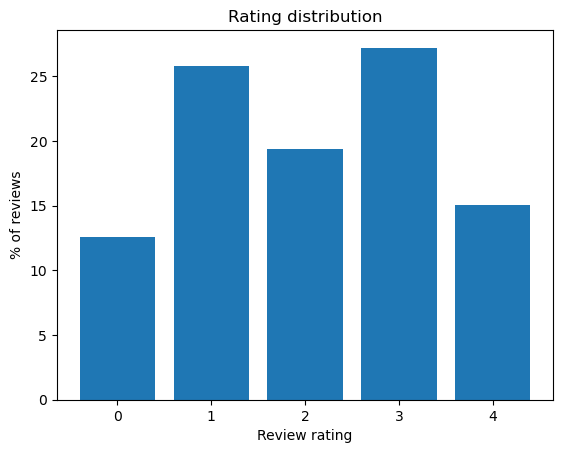

In [6]:
values, counts = np.unique(data['Sentiment'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(values, normalized_counts * 100)
plt.xlabel('Review rating')
plt.ylabel('% of reviews')
plt.title("Rating distribution")
plt.show()

In [7]:
data['word_count'] = data.Phrase.str.split().str.len()

In [8]:
data.word_count.describe()

count    8529.000000
mean       18.999179
std         9.361656
min         0.000000
25%        12.000000
50%        18.000000
75%        25.000000
max        52.000000
Name: word_count, dtype: float64

How do we move from our human understanding that these are good or bad reviews, to modeling it?

### Simplifying the Problem

Let's start with a simpler version of this problem to get an idea of how much information our data can give us.

We will create a new set of ratings where 0, 1, and 2 will count as 0 (bad), , and 3 and 4 will count as 1 (good).

In [9]:
simple_data = data.copy()
simple_data.head()

,SentenceId,Phrase,Sentiment,word_count
0,1,A series of escapades demonstrating the adage ...,1,37
1,2,"This quiet , introspective and entertaining in...",4,11
2,3,"Even fans of Ismail Merchant 's work , I suspe...",1,21
3,4,A positively thrilling combination of ethnogra...,3,26
4,5,Aggressive self-glorification and a manipulati...,1,7


In [10]:
simple_data['Sentiment'] = np.where(simple_data['Sentiment'] >= 3, 1, 0)
simple_data.head()

,SentenceId,Phrase,Sentiment,word_count
0,1,A series of escapades demonstrating the adage ...,0,37
1,2,"This quiet , introspective and entertaining in...",1,11
2,3,"Even fans of Ismail Merchant 's work , I suspe...",0,21
3,4,A positively thrilling combination of ethnogra...,1,26
4,5,Aggressive self-glorification and a manipulati...,0,7


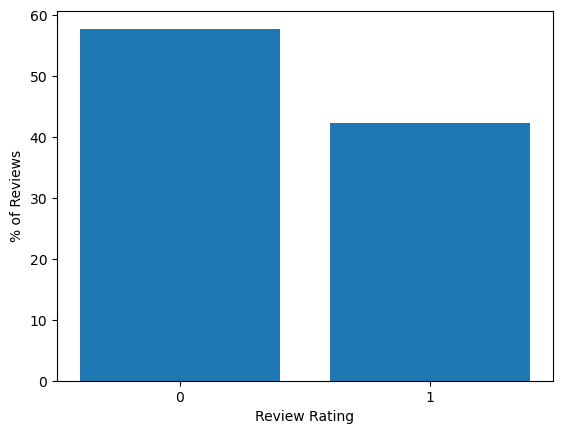

Class imbalance: [0.58 0.42]


In [11]:
values, counts = np.unique(simple_data['Sentiment'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(["0", "1"], normalized_counts*100) # plot normalized counts
plt.xlabel('Review Rating')
plt.ylabel('% of Reviews')
plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")

In [12]:
# store simplified data in X and y
X = simple_data['Phrase']
y = simple_data['Sentiment']

This is quite common if we're about to approach a serious problem (and sentiment analysis is very serious business). We first create a simpler representation and find out if we can even tell apart "good" from "bad."

### The Bag-of-Words model

In a [bag-of-words model](https://en.wikipedia.org/wiki/Bag-of-words_model), we take each word that exists in our corpus, count its occurrences in each document, and make this count a feature to form the document-term matrix. So, each document is a row and each unique word in the corpus is a column.


|          | BrainStation | is | awesome | we | are | learning | so | much | at | the  | great |
|----------|--------------|----|---------|----|-----|----------|----|------|----|-----|-------|
|sentence1 |        1     |  1 |    1    |  0  |   0  |    0      |   0 |   0   |   0 |    0  |   0    |
|sentence2 |        1     |  0  |    0     |  1 | 1   |   1      | 1  |  1   | 1  |   0     |    0   |
|sentence3 |         0     | 1  |     0    |  0  |   0  |   1      | 1  |    0  | 0   |  1     |   1   |


The first step in any NLP task is  to _tokenize_ our data - this is splitting it into individual words, or tokens. There are many different kinds of tokenizer, But let's start with a simple one, which is just to split each string on the whitespace between the words.

Let's start with a very simple corpus.

In [13]:
review1 = 'This was absolutely the best movie I have ever seen, not sure it can ever be beaten'
review2 = 'This was absolutely not the best movie I have ever seen, sure it can be beaten'
review3 = 'This was absolutely the best movie I have ever seen'

small_reviews = pd.DataFrame({"Review": [review1, review2, review3]})
small_reviews

,Review
0,This was absolutely the best movie I have ever...
1,This was absolutely not the best movie I have ...
2,This was absolutely the best movie I have ever...


In [14]:
#Tokenizing these reviews

small_reviews['Review'].str.split(' ')

0    [This, was, absolutely, the, best, movie, I, h...
1    [This, was, absolutely, not, the, best, movie,...
2    [This, was, absolutely, the, best, movie, I, h...
Name: Review, dtype: object

We now need to take this  tokenized  corpus and make the document-term matrix using the bag of words model. We can do that using the `CountVectorizer()` function from Sklearn. One useful feature of the `CountVectorizer()` function is that by default it will perform the same form of tokenization for us (i.e it will split the strings on the whitespace). So we can just feed in our reviews column.

Let's fit it first and talk about what we are seeing.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
small_transformed = []

In [18]:
# 1. Instantiate 
bagofwords = CountVectorizer()

# 2. Fit 
bagofwords.fit(small_reviews["Review"])

# 3. Transform
small_transformed = bagofwords.transform(small_reviews["Review"])
small_transformed

<3x15 sparse matrix of type '<class 'numpy.int64'>'
	with 39 stored elements in Compressed Sparse Row format>

We can see that the the output of the `CountVectorizer()` is a sparse matrix. This will always be the case because the matrix that is returned is usually very large and contains lots of 0s. 

So how does this document-term matrix look? We can extract the information out of the sparse matrix with the following functions: 

In [19]:
# these are now the features, they are the individual tokens
bagofwords.get_feature_names()

['absolutely',
 'be',
 'beaten',
 'best',
 'can',
 'ever',
 'have',
 'it',
 'movie',
 'not',
 'seen',
 'sure',
 'the',
 'this',
 'was']

In [20]:
# converting the sparse matrix into a numpy array
small_transformed.toarray()

array([[1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1]])

In [40]:
# We can extract the information and put it in a data frame to make it easier to see what has occured
my_df = pd.DataFrame(columns=bagofwords.get_feature_names(), data=small_transformed.toarray())
display(my_df)

,absolutely,be,beaten,best,can,ever,have,it,movie,not,seen,sure,the,this,was
0,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0,0,1,0,1,1,0,1,0,1,0,1,1,1


You can see that the information contained is just the counts of how many times each token occurs in each document (in this case each document refers to a review).

This is a good start, but we have some problems - think about the sentences:

`This was absolutely the best movie I have ever seen, not sure it can ever be beaten.`

`This was absolutely not the best movie I have ever seen, sure it can be beaten.`

These look identical to a bag of words model - a 'not' can be in any place, and can substantially modify the meaning of a sentence.

Or:

`This is the best Adam Sandler movie I have ever seen.`

Depending on the user, this might be a great compliment, or a sarcastic jab.

We will look at ways to deal with these issues. For now let's implement a bag-of-words model to our reviews data.

### Bag-of-Words on the Reviews Data

In [150]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Remember that the ultimate goal is to perform classification on each document, to say whether there is a positive or negative sentiment in each review. Hence, the actual reviews become our `X` and the 0 or 1 column we made becomes our `y`.

In [42]:
# size of training data
X_train.shape

(5714,)

Let's now make a document-term matrix that's based on our training data.

In [43]:
# 1. Instantiate
bagofwords = CountVectorizer()

# 2. Fit
bagofwords.fit(X_train)

# 3. Transform
X_train_transformed = bagofwords.transform(X_train)
X_train_transformed

<5714x12530 sparse matrix of type '<class 'numpy.int64'>'
	with 86463 stored elements in Compressed Sparse Row format>

In [52]:
X_train_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

We can see that the sparse matrix has 5,714 rows and 12,530 columns. This means that there are 12,530 unique terms or tokens. 

---
### (Supplementary) Why Sparse Matrices?

A `5714x12530` matrix would take ~0.5GB (500MB) to store in a dense matrix as opposed to about 8MB in CSR format:

In [53]:
# calculation of how many MB a dense matrix would take up
# 5714 sentences * 12530 terms * 8 bits in a byte / 1024b per kb / 1024 kb per Mb 
5714*12530 * 8/1024/1024

546.2373352050781

In [54]:
# how much memory does our sparse matrix take up?
(X_train_transformed.data.nbytes + X_train_transformed.indptr.nbytes + X_train_transformed.indices.nbytes)*8/1024/1024

8.09033203125

The sparse matrix takes up 8MB.

----

**Transforming the test set**

We know that when we train a model on some training data and want to test the same model, the testing data has to be in the exact same format as the training data. This means that the train and test data have to contain the same features. **This means that we have to use the bag-of-words vectorizer fitted to our training data to transform our test data as well.** 

In [55]:
X_test_transformed = bagofwords.transform(X_test)
X_test_transformed

<2815x12530 sparse matrix of type '<class 'numpy.int64'>'
	with 39166 stored elements in Compressed Sparse Row format>

If there are new words in the test set that were not present in the training data, they get ignored.


**Looking at frequent tokens**

Let's take a look at some of our features/words, taking a sample first:

In [56]:
words = bagofwords.get_feature_names()
some_indices = range(1, 12530, round(12530/10)) # just pick some indices

samples = [words[i] for i in some_indices]
print(samples)

['10', 'bluescreen', 'cowering', 'equal', 'hackneyed', 'landbound', 'nourishing', 'rap', 'six', 'toes']


And lets extract the total counts for how many times they occur:

In [57]:
counts = np.array(X_train_transformed[:, some_indices].sum(axis = 0))

display(pd.DataFrame({"total_corpus_count": counts[0]}, index=samples).T)

,10,bluescreen,cowering,equal,hackneyed,landbound,nourishing,rap,six,toes
total_corpus_count,12,2,1,3,8,1,2,4,3,1


Cool, we can see that summing up a column of our `X_train` document-term matrix gives how many times a token appeared in our overall corpus. 

Let's find the most frequently occurring words next.

In [58]:
len(bagofwords.get_feature_names())

12530

In [59]:
X_train_transformed.toarray().sum(axis=0)

array([ 2, 12,  7, ...,  1,  1,  1])

Now, we are ready to look at the top 20 words and visualize the distribution of counts:

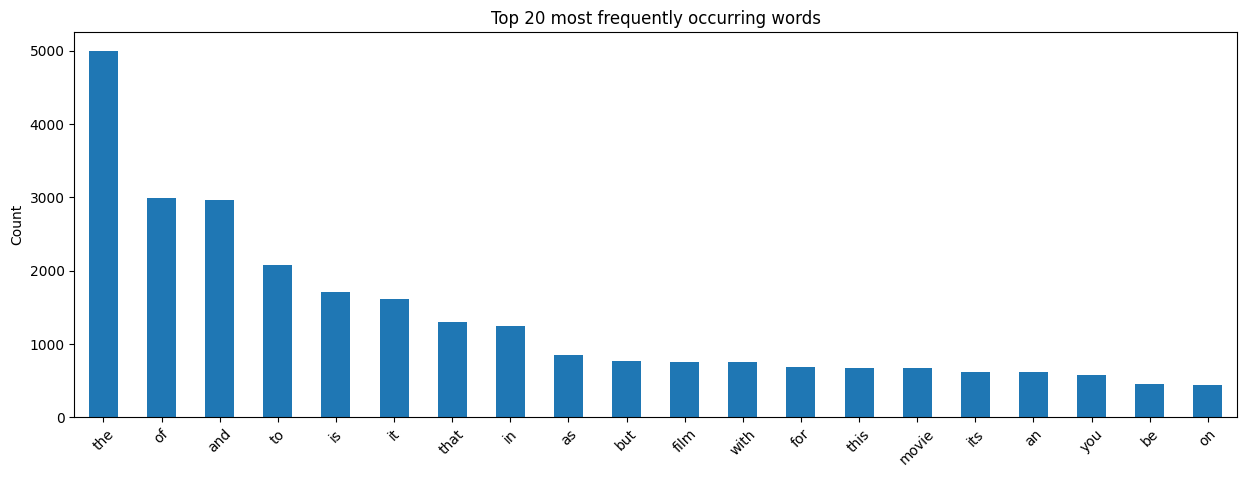

In [60]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Unsuprisingly the most common tokens are words like 'the', 'of', and 'and.'
These common words are known as **stopwords** and are not really useful in understanding of the text. Fortunately, there is a quick solve for this.

#### Stopwords

Our goal is to remove very frequent words that do not have a lot of extra content or enrich our understanding of the text. These could be articles ('the'), prepositions ('ago'), pronouns ('her'), conjunctions ('or'), and simple verbs like 'be' and 'have'. These words are categorized as **stop words** and a common text processing step is to remove them completely. 

We will now use the same `CountVectorizer()` function, but add in an argument which takes away common stop words. You can also provide your own stop word collection as a list.

In [62]:
bagofwords = CountVectorizer(stop_words="english")
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train) 
X_test_transformed = bagofwords.transform(X_test) 

X_train_transformed.shape

(5714, 12257)

We have reduces the number of features from 12530 to 12257. What are the most common words now?

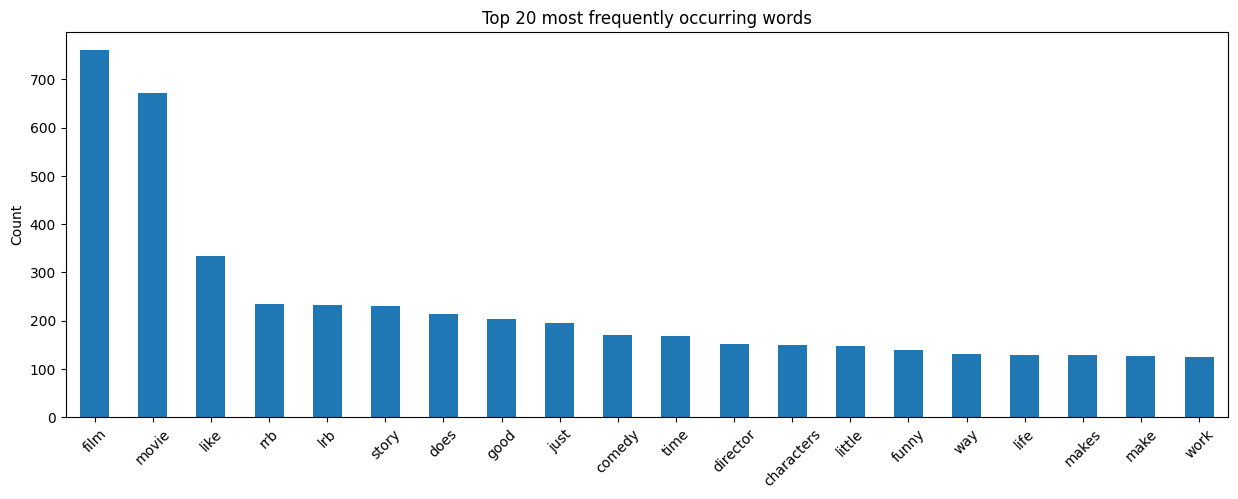

In [63]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Fitting a classifier

Next, let's fit a model - remember we have not done anything super complicated, just counted each word. For now we will use a Logistic Regression model to predict if a review is positive or negative.

In [67]:
# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.8412670633531677
Test score: 0.7072824156305506


Not bad for a binary classification problem, although we definitely see some overfitting. Keep in mind that by random guessing we would have gotten slightly over 50% correctly (since there are more "bad" reviews than "good" ones), so we are doing better than just randomly guessing. So our model has learned something!

### Something to always consider: Stratifying your data

This is important to make sure the distribution of your data between the train and test set is similar. This is especially important when you deal with unbalanced classes 

In [183]:
print("% of bad reviews in training set:", y_train.value_counts()[0]/len(y_train) * 100)
print("% of good reviews in training set:", y_train.value_counts()[1]/len(y_train) * 100)

print("\n% of bad reviews in test set:", y_test.value_counts()[0]/len(y_test) * 100)
print("% of good reviews in test set:", y_test.value_counts()[1]/len(y_test) * 100)

% of bad reviews in training set: 57.96289814490725
% of good reviews in training set: 42.03710185509276

% of bad reviews in test set: 57.37122557726465
% of good reviews in test set: 42.62877442273535


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [186]:
print("% of bad reviews in training set (after stratifying):", y_train1.value_counts()[0]/len(y_train1) * 100)
print("% of good reviews in training set (after stratifying):", y_train1.value_counts()[1]/len(y_train1) * 100)

print("\n% of bad reviews in test set (after stratifying):", y_test1.value_counts()[0]/len(y_test1) * 100)
print("% of good reviews in test set (after stratifying):", y_test1.value_counts()[1]/len(y_test1) * 100)

% of bad reviews in training set (after stratifying): 57.77038851942598
% of good reviews in training set (after stratifying): 42.22961148057403

% of bad reviews in test set (after stratifying): 57.761989342806395
% of good reviews in test set (after stratifying): 42.238010657193605


In [187]:
## After stratifying
bagofwords = CountVectorizer(stop_words="english")
bagofwords.fit(X_train1)

X_train_transformed1 = bagofwords.transform(X_train1) 
X_test_transformed1 = bagofwords.transform(X_test1) 

# Fitting a model
logreg1 = LogisticRegression(C = 0.1)
logreg1.fit(X_train_transformed1, y_train1)

# Training and test score
print(f"Train score: {logreg1.score(X_train_transformed1, y_train1)}")
print(f"Test score: {logreg1.score(X_test_transformed1, y_test1)}")

Train score: 0.8461673083654183
Test score: 0.7197158081705151


### Let's look at the coefficients of our model:

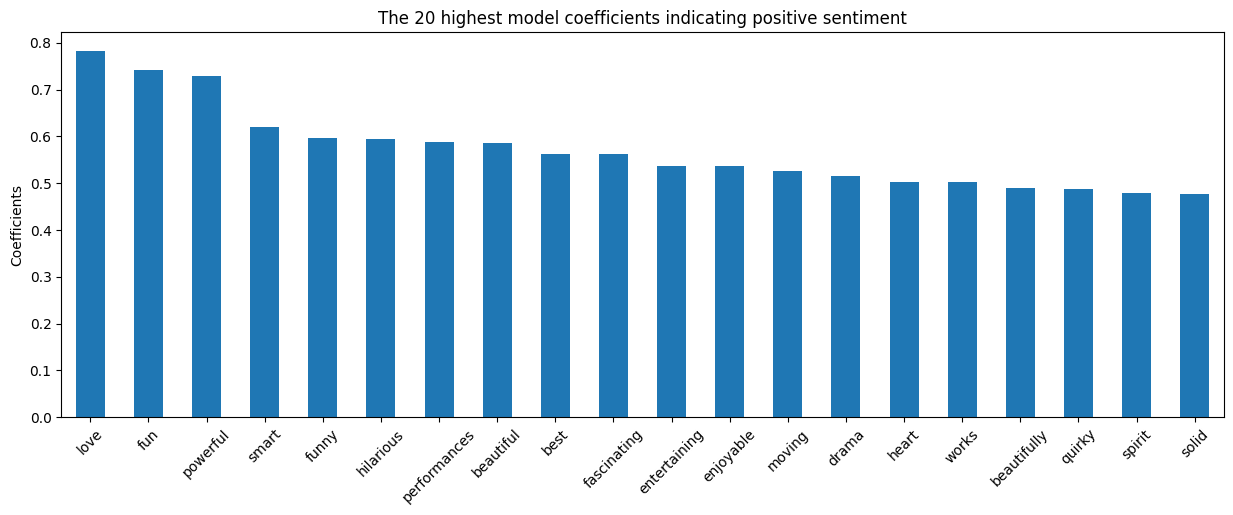

In [68]:
word_counts = pd.DataFrame(
    {"coefficients": logreg.coef_[0]},
    index=bagofwords.get_feature_names()
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

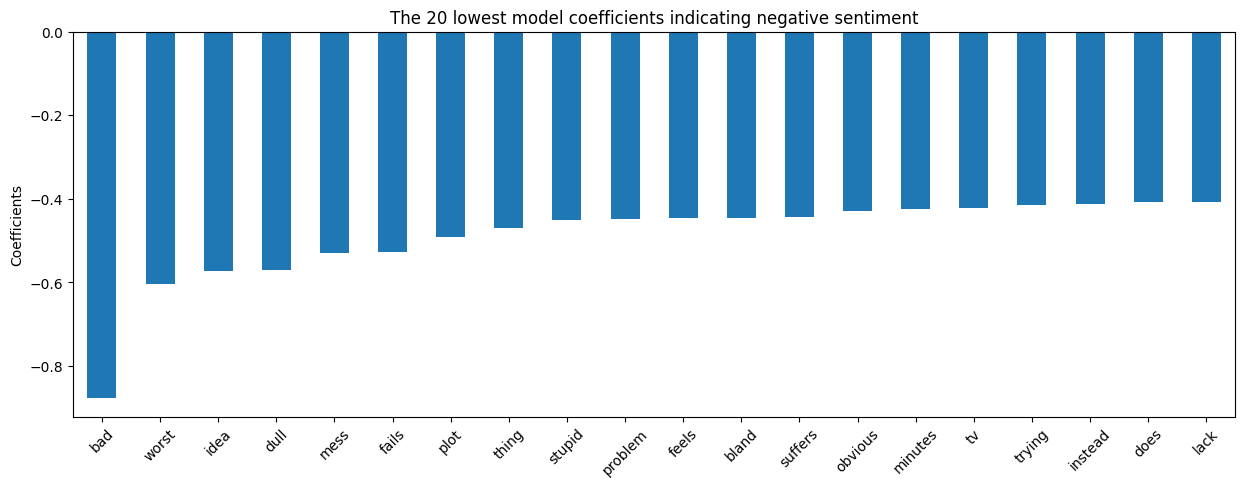

In [77]:
word_counts.sort_values("coefficients", ascending=True).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 lowest model coefficients indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

---

#### Exercise 2

Fit a Logistic Regression, KNN and a decision tree model. How do they compare in terms of model performance? 

---

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [79]:
# Random seed for reproducibility
np.random.seed(123)

# Instantiate models
logreg = LogisticRegression(C = 1.0)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(max_depth=10)

# Fit models
logreg.fit(X_train_transformed, y_train)
knn.fit(X_train_transformed, y_train)
dt.fit(X_train_transformed, y_train)

DecisionTreeClassifier(max_depth=10)

In [80]:
# Score Models
print(f'Log Reg train: {logreg.score(X_train_transformed, y_train)} Log Reg test:{logreg.score(X_test_transformed, y_test)}')
print(f'KNN train: {knn.score(X_train_transformed, y_train)} KNN test:{knn.score(X_test_transformed, y_test)}')
print(f'DT train: {dt.score(X_train_transformed, y_train)} DT test:{dt.score(X_test_transformed, y_test)}')

Log Reg train: 0.9660483024151207 Log Reg test:0.7364120781527531
KNN train: 0.708260413020651 KNN test:0.5658969804618117
DT train: 0.6335316765838291 DT test:0.5985790408525755


### Removing Infrequent Words

We saw that our document-term matrix had a huge number of columns. `CountVectorizer` allows us to remedy this by removing infrequent words which occur in a small number of documents only. This can be useful for two reasons:

1. If someone wrote a certain actor is "an utter failure" and their review is bad, it makes sense. But is that really a trend our models should pay attention to?
2. There may be a large group of words that each appear in only in a few documents. Ignoring those words reduces our memory and run-time consumption even more, allowing us to do faster processing on laptops and desktops.

In our vectorizer, we can 

* add a `min_df` parameter to exclude any token that occurs in less than `min_df` documents (i.e, remove terms that appear too infrequently)
* add a `max_df` parameter to exclude any token that occurs in more than `max_df` documents, (i.e, remove terms that appear too frequently) and
* add a `max_features` parameter to restrict the vectorization to the `max_features`-many most frequent tokens (hence explicitly limiting our column count to `max_features`).

In [82]:
bagofwords = CountVectorizer(stop_words="english", min_df=5) #ignore terms that appear in less than 5 documents
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)

X_train_transformed.shape

(5714, 2197)

We have dropped the number of words down to 2197! That is a much bigger reduction. You can check that the `max_df` parameter does not make a huge difference here, especially after we removed the stop words already. The `max_features` parameter is still useful though:

In [85]:
bagofwords = CountVectorizer(stop_words="english",
                             min_df=5,
                             max_features=1000)
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)

X_train_transformed.shape

(5714, 1000)

These are huge improvements that could help us build better and faster models, especially when high dimensionality is a problem.

### Stemming and Lemmatization

In language, we often use variations on the same word or meaning: run, runs, running, ran, jogged, jogging, jogs......  These examples are all forms of the word 'run' in different tenses. We need to make the decision on whether the added context provided by the tenses is worth the additional complexity for our model. When working with more simple vectorization techniques and standard models such as logistic regression, the answer is often no.

You might have noticed during our vectorizing, we removed the punctuation and capitals by default - this is part of the normalization process build into `CountVectorizer`. There are two ways to find a common root form of words:

- **stemming**: stemming is a heuristic (rules-based) way of cutting off 's', 'ing' and other endings to reduce words to a basic root form. There are various strategies for carrying this out and these are obviously language specific. Also, note that stemming does not guarantee that you end up with a meaningful word (laziness -> lazi).

- **lemmatization**: is a lexicographic look-up, where each word is mapped to a fixed, meaningful common root form (laziness -> lazy).  While its beneficial to map back to a meaningful common root form, lemmatization is a lot more complex. For example, the root form of a word can actually change depending on whether it is used as a verb or a noun.
    * A good example of this is the word *saw*:
        * *saw* (verb) -> *see* 
        * *saw* (noun) -> *saw*
        
|  Word  | Stemming (Rule based) | Lemmatization (Dictionary based) |
|----------|--------------|----|
|information | inform  |  information |
|informative | inform  |  informative | 
|computer    | comput  |  computer    |
|laziness    | lazi    |  lazy    |  
        

We will look into stemming with the Porter Stemmer from [nltk](http://www.nltk.org/howto/stem.html), one of the most widely used NLP packages. 

In [87]:
import nltk

# Let's test it out
stemmer = nltk.stem.PorterStemmer()

[stemmer.stem(i) for i in ['run', 'runs', 'running', 'ran', 'jogged', 'jogging', 'jogs']]

['run', 'run', 'run', 'ran', 'jog', 'jog', 'jog']

We can see exactly what the `PorterStemmer()` function above. Let's now apply it to our data. `CountVectorizer`, has a tokenizer parameter where we can pass in our own function to tokenize and process the text

In [88]:
bagofwords = CountVectorizer(min_df=5, 
                             tokenizer = lambda x: [stemmer.stem(i) for i in x.split(' ')], 
                             stop_words='english')
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test)

In the above bag-of-words model, we are actually changing the tokenizer itself. Rather than having the tokens be the unique words, we are adding stemming in the process. 

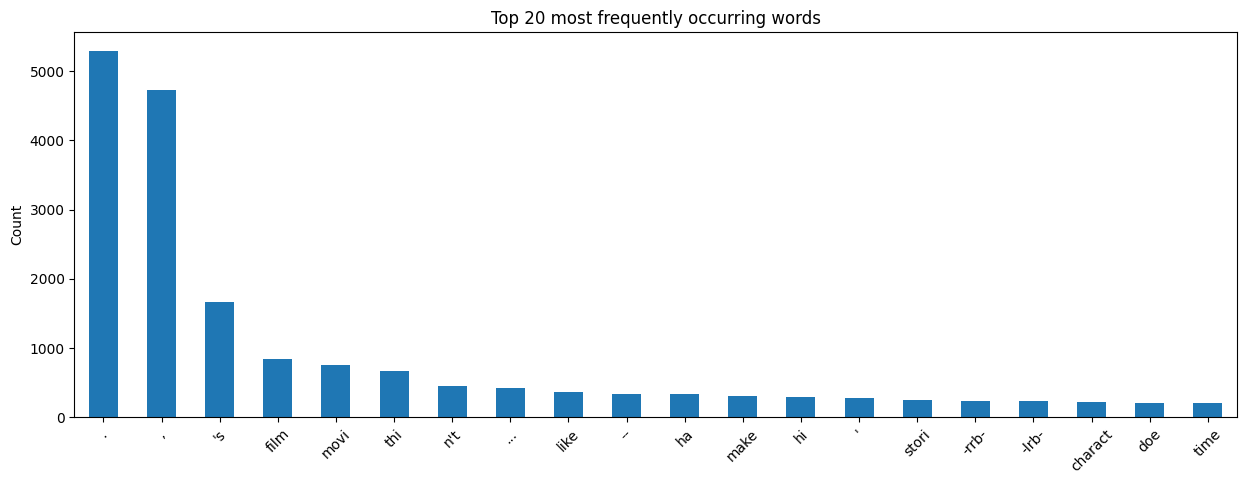

In [91]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Notice this time we got some strange results such as punctuation marks, and some other unclear words. This is because our custom tokenizer lacked many features that the built-in one had, we only split the words into tokens and then stemmed them. 

### Custom Tokenizers 

By default, Sklearn vectorizers will perform basic tokenization for us including removal of punctuation (as best as it can) and lowercasing all text. However we can define our own function to do this and pass this in as an argument to the vectorizer. This allows us to incorporate more advanced techniques such as stemming or lemmatization or other NLP techniques

Lets go ahead and define our own function that will deal with punctuation prior to stemming. 


In [92]:
# the python string package has a helpful punctuation list
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Next, we upgrade our tokenizer to remove punctuation marks before stemming. Similarly, we could remove numerical values and take any other text cleaning steps such as bringing short-hand words like *be4* or *4ever* into their proper form.

In [93]:
# a dummy sentence used for checking our process
sentence = "The quick brown fox, jumped over the lazy dog!!"

# after splitting the text based on spaces
split_sentence = sentence.split(' ')

# we stem and remove punctuation
tokenized_sentence = []
for word in split_sentence:
    for punctuation_mark in string.punctuation:
        word = word.replace(punctuation_mark, '')
    stemmed_word = stemmer.stem(word)
    tokenized_sentence.append(stemmed_word)
    
print(tokenized_sentence)

['the', 'quick', 'brown', 'fox', 'jump', 'over', 'the', 'lazi', 'dog']


Our final tokenizer will also remove stopwords.

In [98]:
%%time
# import the nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords 

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [99]:
# checking tokenizer on simple sentence from above
my_tokenizer(sentence)

['quick', 'brown', 'fox', 'jump', 'lazi', 'dog']

In [100]:
bagofwords = CountVectorizer(min_df=5, 
                             tokenizer=my_tokenizer)
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test)

X_train_transformed.shape

(5714, 2125)

We have 2125 tokens now, but notice that the cell took a few seconds to run. So even a slightly more advanced bag-of-words model is already taking a bit more time to run.

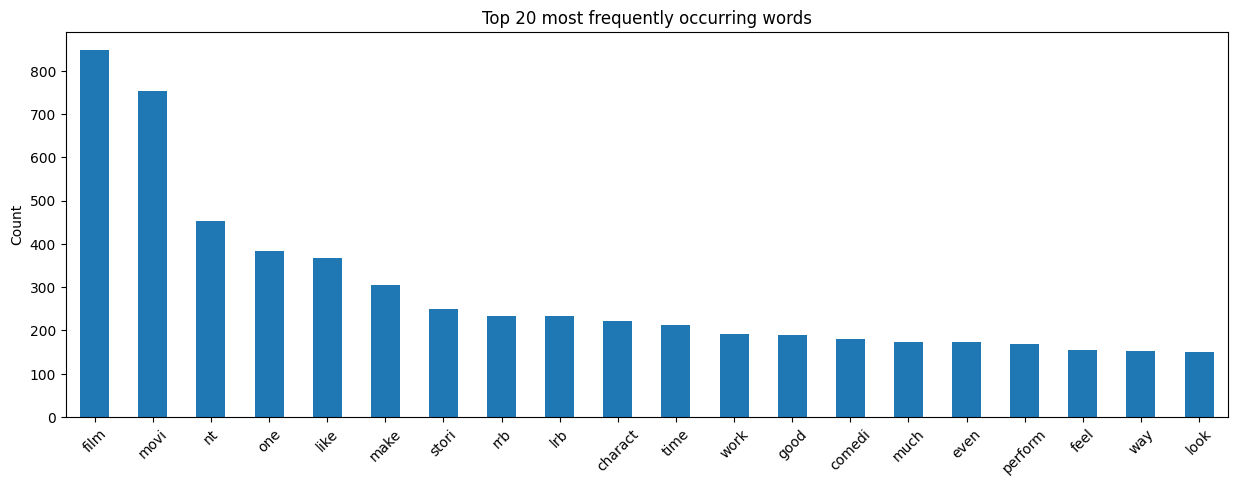

In [101]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Our most common words might not make a lot of sense and some are cut off, but at least they are not stop words or punctuation. 

Let's see how our model will do. 

In [102]:
# Random seed for reproducibility
np.random.seed(123)

# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.8036401820091005
Test score: 0.7200710479573712


Not bad! We get clean tokens, much less features than before and the accuracy on the test set has actually improved ~2%.

### Adding N-grams to the vocabulary

As well as single words, we can start to put in multiple combinations of words into the bag. This will explode out feature space but should lead to better fitting models: "not great" is a lot more informative than "not" and "great" separately. Adding n-grams also helps to preserve some of the sequential nature of text data that is mostly lost in the bag-of-words model.

Two-grams in the following toy sentence:

`the turtle is not fast`

would be: 

`the turtle`

`turtle is`

`is not`

`not fast`


These n-grams usually get added as tokens to our document-term matrix. So the tokens for the above sentence (without other processing) would be:

`the` `turtle` `is` `not` `fast`
`the turtle`
`turtle is`
`is not`
`not fast`. 



To do this in Python, we can pass an argument `ngram_range` into our vectorizer:

In [104]:
bagofwords = CountVectorizer(min_df=5,
                             tokenizer=my_tokenizer,
                             ngram_range=(1, 3))
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test)

X_train_transformed.shape

(5714, 2362)

We have 2362 tokens now, (it was previously 2125), so we ended up adding some tokens, hopefully they are the 2 or 3 grams. 

You will try to find all of the n-grams in the exercise below. 

---

#### Exercise 3

Pull out the most frequent bigrams (2-grams) which were found by the vectorizer. Hint: they contain a space in the string.

---

#### Solution

In [119]:
words = bagofwords.get_feature_names()
word_counts = X_train_transformed.toarray().sum(axis=0)
count_df = pd.DataFrame({'token': words, 'counts': word_counts})
count_df.head(10)

,token,counts
0,1,5
1,10,7
2,10 minut,5
3,100,5
4,1960,5
5,2,10
6,20,10
7,20 year,5
8,2002,10
9,30,5


In [120]:
#filter for bigrams

count_df[count_df['token'].str.split(' ').apply(len) == 2].sort_values('counts', ascending=False).head(20)

,token,counts
264,ca nt,59
757,feel like,49
1217,lrb rrb,36
1735,romant comedi,32
2310,wo nt,32
1538,play like,24
2005,subject matter,21
1746,run time,18
775,film nt,18
1212,love stori,18


## TF-IDF Vectorization

Using our `CountVectorizer` and `min_df`, we've only enforced that words that appear in less than 5 documents should be discarded, while all other words are kept. In essence we are saying that words that appear less frequently may not be so important.

There is, however, also the argument that words that appear infrequently are VERY important. Using either "good" or "bad" might be very common, but more uncommon words like "terrific" or "atrocious" should be given more weight.  

For this purpose we have the TF-IDF Vectorizer, which is composed of multiplying the following: 

1. **Term Frequency (TF)** - which is the number of times a given word appears in a document (review), this is the same as the content of our bag-of-words document-term matrix;
2. **Inverse Document Frequency (IDF)** - Inverse of the number of documents (reviews) a given word appears in.

TF-IDF is scored between 0 and 1. The higher the numerical weight value, the rarer the term. The smaller the weight, the more common the term. 

Assuming we have a collection of tokens $[t_1, t_2, t_3, ..., t_n]$, and a collection of documents $D = [d_1, d_2, d_3, ... d_m]$ the overall formula for a TF-IDF score is:

$$TF(t_i, d_j) \times IDF(t_i, D)$$

Where:
* $TF(t_i, d_j)$ is the term frequency of token $i$ in document $j$. 
* $IDF(t_i, D)$ is the inverse document frequency of term $i$ in all documents (corpus). In the simplest case it is:

$$\frac{len(D)}{len(\{\text{all $d_k$ such that $t_i \in d_k$} \})+1}$$

For example:
* When a 100-word document contains the term “Chipotle” 5 times, the TF for the word ‘Chipotle’ is TF(Chipotle) = 5/100 i.e. 0.05
* Say the size of the corpus is 2000, and we calculate that "Chipotle" occurs in 700 of those document, then IDF(Chipotle) = 2000/700 = 2.86

$$ \text{TF-IDF(Chipotle)} = 0.05 \times 2.857 = 0.143 $$

* What happens if "Chipotle" occurs in only 200 of those document? Then IDF(Chipotle) = 2000/200 = 10

$$ \text{TF-IDF(Chipotle)} = 0.05 \times 10 = 0.5 $$





In simple words, instead of our document-term matrix containing just the count of each token, it now contains a weight. 

- Words that are very common across documents are going to have their count be scaled down 
- Words that are less common across documents are going to have their count be scaled up

That way, when any model is trying to learn whether a word is predictive of sentiment, it will put more focus on the less common words.

In `sklearn`, we can use this vectorizer with the `TfidfVectorizer` function.

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [133]:
# taking a toy data set
review1 = 'This was absolutely the best movie I have ever seen, not sure it can ever be beaten'
review2 = 'This was absolutely not the best movie I have ever seen, sure it can be beaten'
review3 = 'This was absolutely the best movie I have ever seen. period!'

small_reviews = pd.DataFrame({"Review": [review1, review2, review3]})
display(small_reviews)

,Review
0,This was absolutely the best movie I have ever...
1,This was absolutely not the best movie I have ...
2,This was absolutely the best movie I have ever...


In [134]:
bagofwords = CountVectorizer().fit(small_reviews["Review"])
small_transformed = bagofwords.transform(small_reviews["Review"])

my_df = pd.DataFrame(columns=bagofwords.get_feature_names(), data=small_transformed.toarray())
display(my_df)

,absolutely,be,beaten,best,can,ever,have,it,movie,not,period,seen,sure,the,this,was
0,1,1,1,1,1,2,1,1,1,1,0,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
2,1,0,0,1,0,1,1,0,1,0,1,1,0,1,1,1


In [135]:
tfidf = TfidfVectorizer().fit(small_reviews["Review"])
small_transformed = tfidf.transform(small_reviews["Review"])

my_df = pd.DataFrame(columns=tfidf.get_feature_names(), data=small_transformed.toarray())
display(my_df)

,absolutely,be,beaten,best,can,ever,have,it,movie,not,period,seen,sure,the,this,was
0,0.213449,0.274855,0.274855,0.213449,0.274855,0.426899,0.213449,0.274855,0.213449,0.274855,0.000000,0.213449,0.274855,0.213449,0.213449,0.213449
1,0.229726,0.295814,0.295814,0.229726,0.295814,0.229726,0.229726,0.295814,0.229726,0.295814,0.000000,0.229726,0.295814,0.229726,0.229726,0.229726
2,0.290291,0.000000,0.000000,0.290291,0.000000,0.290291,0.290291,0.000000,0.290291,0.000000,0.491506,0.290291,0.000000,0.290291,0.290291,0.290291


The `sklearn` implementation uses a more complex IDF count, so we will not get into the math of these numbers, but it is very customizable so feel free to look at the documentation.

Notice that while for the `CountVectorizer` the word "absolutely" got a value of 1 for all three documents, the `TfidfVectorizer` gave it a higher value for a short review (it makes up a bigger part of that sentence).

Also notice that while for the `CountVectorizer`, the value for the word "period" is 1, the same value as for the words "movie", "beaten", and "have", the `TfidfVectorizer` gave it the highest value since it only appears in one document.

Now, looking at our reviews data:

In [136]:
# using our custom tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5,
                        tokenizer=my_tokenizer)
tfidf.fit(X_train)

X_train_transformed = tfidf.transform(X_train)
X_test_transformed = tfidf.transform(X_test)

X_train_transformed.shape

(5714, 2125)

We can also visualize the words with largest overall weight over the corpus:

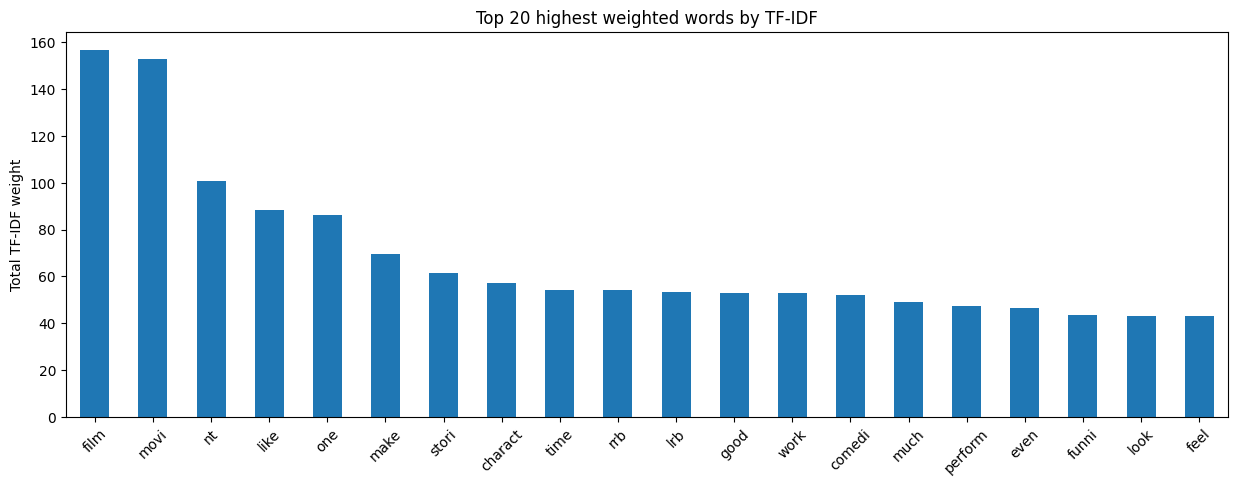

In [137]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=tfidf.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 highest weighted words by TF-IDF")
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=45)
plt.show()

There is some difference in which tokens become more important compared to the `CountVectorizer`. You can rerun the model with this representation but note that you will need to tune the hyperparameters for good performance because we completely changed our data.

### (Supplementary) Sentiment Classification with Transformers

Well, most of you have heard of ChatGPT. The "GPT" in ChatGPT stands for "Generative Pretrained Transformer". The underlying model architecture that powers ChatGPT is the Transformers. Transformers was first introduced in June 2017 by a team at Google Brain and it wasn't until late 2018, when the BERT model was introduced and NLP developement took off! 

In [2]:
from datasets import load_dataset, Dataset, load_metric
from transformers import DataCollatorWithPadding, AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
tokens = tokenizer.tokenize("I'm learning about Transformers at BrainStation!")
print(tokens)

['i', "'", 'm', 'learning', 'about', 'transformers', 'at', 'brains', '##tation', '!']


In [3]:
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

[1045, 1005, 1049, 4083, 2055, 19081, 2012, 14332, 12516, 999]


In [4]:
tokenizer.get_vocab()['brains']

14332

In [5]:
len(tokenizer.get_vocab())

30522

In [6]:
df = pd.read_csv("data/rottentomatoes.csv")

df['labels'] = np.where(df['Sentiment'] >= 3, 1, 0)
df['text'] = df['Phrase']
X_train, X_test, y_train, y_test = train_test_split(df, df.labels, test_size=0.33, random_state=42, stratify=df.labels)

Next, we'll  prepare the text inputs for the model for both splits of our dataset (training and test) by using the `map` method

In [7]:
train_df = Dataset.from_pandas(X_train[['text','labels']])
test_df = Dataset.from_pandas(X_test[['text', 'labels']])

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

tokenized_train = train_df.map(preprocess_function, batched=True)
tokenized_test = test_df.map(preprocess_function, batched=True)


#To speed up training, let's use a data_collator to convert our training samples to PyTorch tensors and concatenate them with the correct amount of padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Map:   0%|          | 0/5714 [00:00<?, ? examples/s]

Map:   0%|          | 0/2815 [00:00<?, ? examples/s]

In [8]:
 def compute_metrics(eval_pred):
    load_accuracy = load_metric("accuracy")
    load_precision = load_metric("precision")
    load_recall = load_metric("recall")
    load_f1 = load_metric("f1")
  
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
    f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
    return {"accuracy": accuracy, "f1": f1}

In [9]:
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'pre_classi

In [10]:
repo_name = "finetuning_rottentomatoes"
 
training_args = TrainingArguments(
    output_dir=repo_name,
    learning_rate=2e-6,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    save_total_limit = 2,
    evaluation_strategy='epoch',
    load_best_model_at_end=True,
    seed=42,
    lr_scheduler_type="cosine",
    warmup_ratio=0.05,
    weight_decay=0.01,
    save_strategy="epoch",
    fp16_full_eval=True,
    fp16=True,
    metric_for_best_model="f1",
    push_to_hub=False,
)
 
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

Using cuda_amp half precision backend


In [11]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 5714
  Num Epochs = 10
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 1790
  Number of trainable parameters = 66955010
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, 

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.598251,0.698401,0.456814
2,No log,0.430293,0.816696,0.775457
3,0.539200,0.398308,0.825577,0.795842
4,0.539200,0.385378,0.833037,0.804817
5,0.539200,0.380399,0.838721,0.811148
6,0.355300,0.378086,0.839432,0.809924
7,0.355300,0.378108,0.841208,0.808565
8,0.355300,0.377319,0.840497,0.810308
9,0.320600,0.377144,0.841563,0.810857
10,0.320600,0.377194,0.841918,0.811201


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2815
  Batch size = 16
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  
Saving model checkpoint to finetuning_rottentomatoes/checkpoint-179
Configuration saved in finetuning_rottentomatoes/checkpoint-179/config.json
Model weights saved in finetuning_rottentomatoes/checkpoint-179/pytorch_model.bin
tokenizer config file saved in finetuning_rottentomatoes/checkpoint-179/tokenizer_config.json
Special tokens file saved in finetu

TrainOutput(global_step=1790, training_loss=0.3894151783522281, metrics={'train_runtime': 128.2606, 'train_samples_per_second': 445.499, 'train_steps_per_second': 13.956, 'total_flos': 764119560919200.0, 'train_loss': 0.3894151783522281, 'epoch': 10.0})

In [12]:
trainer.evaluate()

The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text, __index_level_0__. If text, __index_level_0__ are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2815
  Batch size = 16


{'eval_loss': 0.3771865963935852,
 'eval_accuracy': 0.8419182948490231,
 'eval_f1': 0.8112006788290198,
 'eval_runtime': 3.7747,
 'eval_samples_per_second': 745.746,
 'eval_steps_per_second': 46.626,
 'epoch': 10.0}

In [32]:
transformers.logging.set_verbosity_info()

In [33]:
from transformers import pipeline
 
sentiment_model = pipeline(task='text-classification', model='/home/jupyter/misc/finetuning_rottentomatoes/checkpoint-1790/')
sentiment_model(["I love this movie", 
                 "This movie sucks!",
                 "This movie was alright."])


loading configuration file /home/jupyter/misc/finetuning_rottentomatoes/checkpoint-1790/config.json
Model config DistilBertConfig {
  "_name_or_path": "/home/jupyter/misc/finetuning_rottentomatoes/checkpoint-1790/",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.26.1",
  "vocab_size": 30522
}

loading configuration file /home/jupyter/misc/finetuning_rottentomatoes/checkpoint-1790/config.json
Model config DistilBertConfig {
  "_name_or_path": "/home/jupyter/misc/finetuning_rottentomatoes/checkpoint-1790/",


[{'label': 'LABEL_1', 'score': 0.8936529159545898},
 {'label': 'LABEL_0', 'score': 0.9385617971420288},
 {'label': 'LABEL_1', 'score': 0.6809536218643188}]

### (Supplementary) Text Similarity

We used nearest neighbour models for classification and regression. Once we represented our text data as numeric vectors, we can use the same models to find similar documents. Let's see how this would work with TF-IDF and our reviews data.

We start by fitting a `NearestNeighbors` model that is used solely for finding nearest neighbors by a specific metric (and not for predicting any class label or target value).

In [143]:
from sklearn.neighbors import NearestNeighbors

nn_model = NearestNeighbors(n_neighbors=1, metric="cosine")
nn_model.fit(X_train_transformed)

NearestNeighbors(metric='cosine', n_neighbors=1)

We then select a document from the test set, query its tf-idf vector with our `nn_model` and look up the closest training document.

In [144]:
idx = 6
print(f"Selected test document:\n {X_test.iloc[idx]}")

# use the nearest neighbour model to find the closest document by the tf-idf representation
dist, neighbour_ind = nn_model.kneighbors(X_test_transformed[idx])

print(f"\nClosest training neighbour:\n {X_train.iloc[neighbour_ind[0]].values[0]}")

Selected test document:
 Initially gripping , eventually cloying POW drama .

Closest training neighbour:
 A gripping drama .


Quite close! Feel free to look up other documents and see how close the actual texts feel.

### (Supplementary) Topic modeling

**Topic modeling or topic clustering** is another example applied to text - think of how Google News clusters articles into sport, business, international, politics, etc. A common method is to use **Latent Dirchlet Allocation** (LDA, not to be confused with Linear Discriminant Analysis, which is also abbreviated as LDA), which is a type of unsupervised learning.
We could also use **Non-negative Matrix Factorization** (NMF). 

Both methods are available in sklearn and are demonstrated [here](https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py).

Using what we learned about text processing, we can quickly run an example of LDA on the `newsgroup` dataset which contains emails from 20 categories.

In [138]:
# parts of the example are from here
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups()

print(f"Number of documents: {len(news_data.data)}")

print(f"\nSample document:\n\n {news_data.data[42]}")

print(f"\nOriginal topics: {news_data.target_names}")

Number of documents: 11314

Sample document:

 From: ab245@cleveland.Freenet.Edu (Sam Latonia)
Subject: Re: Need phone number for Western Digital (ESDI problem)
Organization: Case Western Reserve University, Cleveland, Ohio (USA)
Lines: 5
NNTP-Posting-Host: slc10.ins.cwru.edu


Western Digital 1-800-832-4778.....Sam
-- 
Gosh..I think I just installed a virus..It was called MS DOS6...
Don't copy that floppy..BURN IT...I just love Windows...CRASH...


Original topics: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


First, we vectorize our documents with TF-IDF.

In [139]:
#NLTK has a few prebuilt stopwords lists
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
# We can add in additional words to include further stopwords
# We've added these to remove some email-specific words 
stopwords.extend(['edu','com','cc','gov'])


In [140]:
# BoW vectorization
bagofwords = CountVectorizer(min_df=5,
                        max_df=0.95, # drop words that occur in at least 95% of the documents
                        max_features=1000, 
                        stop_words=stopwords)

news_transformed = bagofwords.fit_transform(news_data.data)

news_transformed.shape

(11314, 1000)

Next, we fit the **Latent Dirichlet Allocation** model to discover related sets of documents. We will set the `n_components` parameter to 10 so that the model looks for 10 topics and limit the fitting procedure to 5 iterations.

In [141]:
from sklearn.decomposition import LatentDirichletAllocation

# fit the LDA topic model
lda = LatentDirichletAllocation(
    n_components=10, 
    max_iter=15,
    random_state=1,
    verbose=1
)

lda.fit(news_transformed)

iteration: 1 of max_iter: 15
iteration: 2 of max_iter: 15
iteration: 3 of max_iter: 15
iteration: 4 of max_iter: 15
iteration: 5 of max_iter: 15
iteration: 6 of max_iter: 15
iteration: 7 of max_iter: 15
iteration: 8 of max_iter: 15
iteration: 9 of max_iter: 15
iteration: 10 of max_iter: 15
iteration: 11 of max_iter: 15
iteration: 12 of max_iter: 15
iteration: 13 of max_iter: 15
iteration: 14 of max_iter: 15
iteration: 15 of max_iter: 15


LatentDirichletAllocation(max_iter=15, random_state=1, verbose=1)

Finally, we can look at which words represent the 10 topics best (these are the words that occurred most frequently for the particular topic).

In [142]:
# for each topic, print the the top 10 most representative words
words = bagofwords.get_feature_names()

for i, topic in enumerate(lda.components_):
    topic_words = " ".join([words[j] for j in topic.argsort()[: -11: -1]])
    print(f"Topic #{i} words: {topic_words}")

Topic #0 words: ax max g9v b8f a86 145 pl 1d9 0d 34u
Topic #1 words: posting host nntp university article writes distribution reply uk please
Topic #2 words: file windows use program system drive files also software using
Topic #3 words: people would gun one israel said government us right turkish
Topic #4 words: space key nasa system would chip use government encryption one
Topic #5 words: god one people would jesus think believe say writes christian
Topic #6 words: writes would one like article get good think time know
Topic #7 words: 00 10 16 15 25 20 14 11 12 17
Topic #8 words: team game year games hockey __ play season players pitt
Topic #9 words: article writes cs university state one science new people would


Can you recognize some of the original topics?